# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [413]:
# your code here

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)
#import warnings

# Ignore all warnings
#warnings.filterwarnings("ignore")

In [414]:
# 1. Load and Inspect the Data
df = pd.read_excel("Online Retail.xlsx")

In [415]:
df.shape #tells the number of columns and rows

(541909, 8)

In [416]:
print("First few rows of the data:")
print(df.head(20))

First few rows of the data:
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749 

In [417]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [418]:
df.columns # show the listed columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [419]:
df.dtypes # show what types of columns it is

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [420]:
# 3. Basic Statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [421]:
df = df[['InvoiceNo', 'StockCode', 
    'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', # 'CustomerID', 
    'Country']].copy()

In [422]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country'],
      dtype='object')

In [423]:
# Method 2: Drop columns
df.drop(['StockCode'], axis=1)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [424]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object

In [425]:
# convert dtype of certain columns
print(df.head(20))

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

In [426]:
df['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [427]:
df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [428]:
# Remove the 'C' prefix from 'InvoiceNo'
df['InvoiceNo'] = df['InvoiceNo'].astype(str).str.replace('C', '', regex=False)

In [429]:
# Convert 'InvoiceNo' to numeric
# df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])

In [430]:
# Rename columns

df = df.rename(columns={'UnitPrice': 'Price'})

In [431]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [432]:
# check isna in columns and dropna on row or column accordingly
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
Price             0
Country           0
dtype: int64

In [433]:
# Locate duplicated rows in single or multiple columns
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [434]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,United Kingdom
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,United Kingdom


In [435]:
 # locate duplicated rows in single or multiple columns
df.loc[df.duplicated(subset=['InvoiceNo'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [436]:
# checking an example of duplicated rows
df.query('Description == "WHITE METAL LANTERN"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
50,536373,71053,WHITE METAL LANTERN,6,2010-12-01 09:02:00,3.39,United Kingdom
67,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,United Kingdom
279,536396,71053,WHITE METAL LANTERN,6,2010-12-01 10:51:00,3.39,United Kingdom
417,536406,71053,WHITE METAL LANTERN,8,2010-12-01 11:33:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
467347,576339,71053,WHITE METAL LANTERN,1,2011-11-14 15:27:00,8.29,United Kingdom
468547,576513,71053,WHITE METAL LANTERN,8,2011-11-15 12:10:00,3.75,United Kingdom
471383,576642,71053,WHITE METAL LANTERN,4,2011-11-16 09:59:00,3.75,United Kingdom
471907,576654,71053,WHITE METAL LANTERN,1,2011-11-16 10:55:00,3.75,United Kingdom


Data prep
-univariate analysis of features - kde, histogram, box plot

In [438]:
# use value counts to determine duplicates and unique values in feature
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [439]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


<Axes: title={'center': 'Top 10 Country'}, xlabel='Country'>

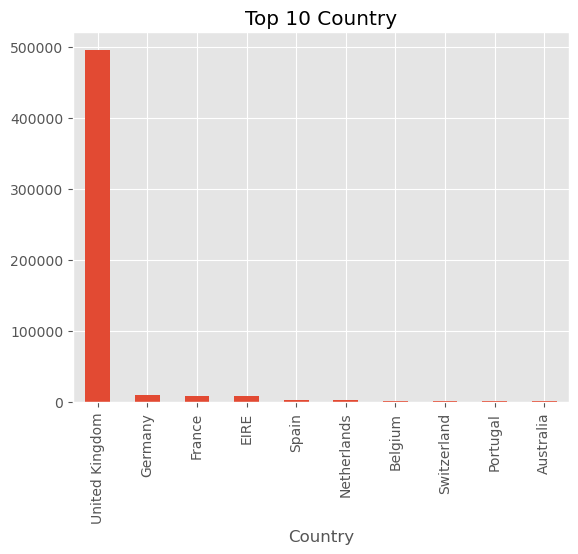

In [440]:
df['Country'].value_counts() \
    .head(10) \
    .plot(kind ='bar', title = 'Top 10 Country')

<Axes: title={'center': 'Top 10 highest selling Item'}, xlabel='Description'>

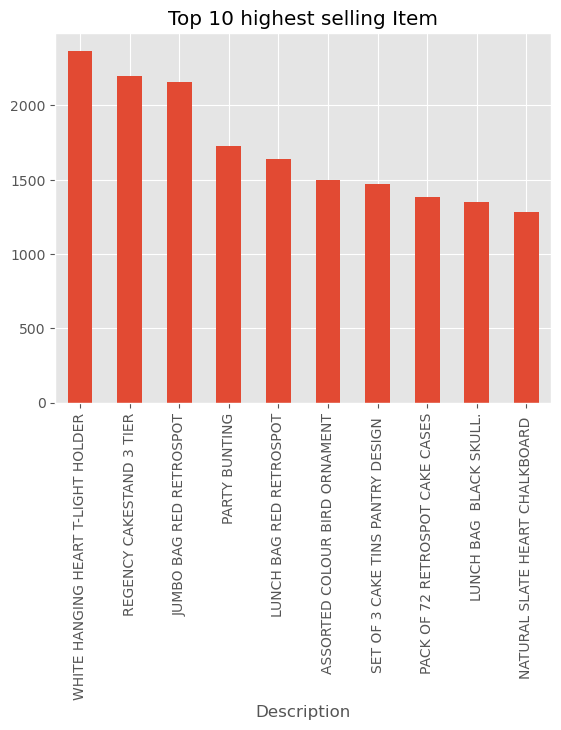

In [441]:
# creates bar plot for top 10 to  highest # of coasters
df['Description'].value_counts() \
    .head(10) \
    .plot(kind ='bar', title = 'Top 10 highest selling Item')

Text(0, 0.5, 'Count')

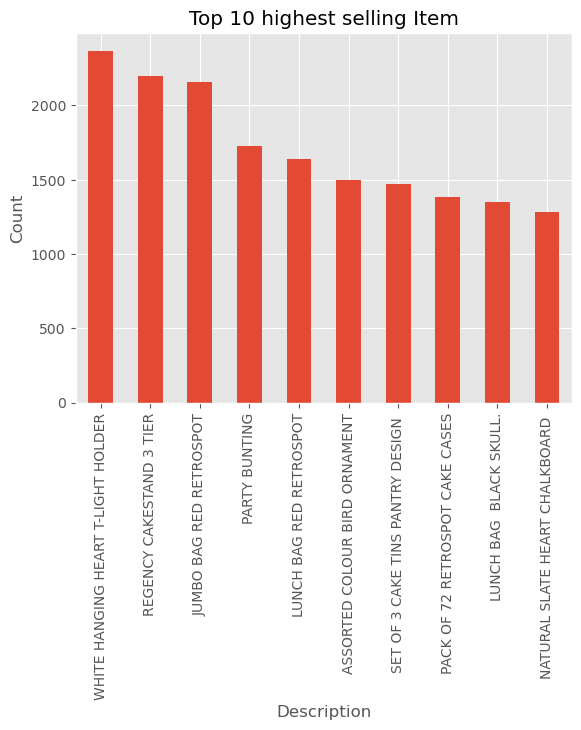

In [442]:
#creates histogram to bin top 10 selling items and view their frequency distribution
ax = df['Description'].value_counts() \
    .head(10) \
    .plot(kind ='bar', title = 'Top 10 highest selling Item')
ax.set_xlabel('Description')
ax.set_ylabel('Count')

Feature understanding - scatterplot, pairplot, correlation, groupby

In [444]:
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')

In [445]:
# create pairplot to compare correlation between features, alongside hue from material type
#df.plot(kind= 'scatter',
           #x='StockCode',
           #y='Quantity')

In [446]:
# Calculate total sales revenue
df['TotalRevenue'] = df['Quantity'] * df['Price']

In [447]:
# Print the first few rows including the new 'TotalRevenue' column
print(df.head())

  InvoiceNo  StockCode                          Description  Quantity  \
0    536365        NaN   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365    71053.0                  WHITE METAL LANTERN         6   
2    536365        NaN       CREAM CUPID HEARTS COAT HANGER         8   
3    536365        NaN  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365        NaN       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price         Country  TotalRevenue  
0 2010-12-01 08:26:00   2.55  United Kingdom         15.30  
1 2010-12-01 08:26:00   3.39  United Kingdom         20.34  
2 2010-12-01 08:26:00   2.75  United Kingdom         22.00  
3 2010-12-01 08:26:00   3.39  United Kingdom         20.34  
4 2010-12-01 08:26:00   3.39  United Kingdom         20.34  


In [448]:
# Print the total revenue for the entire dataset
total_revenue_sum = df['TotalRevenue'].sum()
print("\nTotal Revenue for the entire dataset:", total_revenue_sum)


Total Revenue for the entire dataset: 9747747.933999998


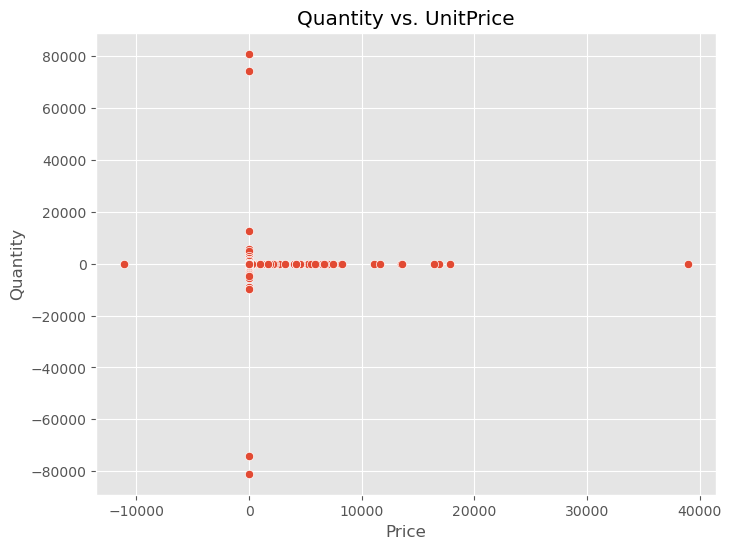

In [449]:
# Scatter plot of Quantity vs. UnitPrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Quantity', data=df)
plt.title('Quantity vs. UnitPrice')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

In [450]:
# 5. Sales Trend Analysis
# Extract month and day of the week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [451]:
# Group by month and calculate total sales
monthly_sales = df.groupby('Month')['TotalRevenue'].sum()

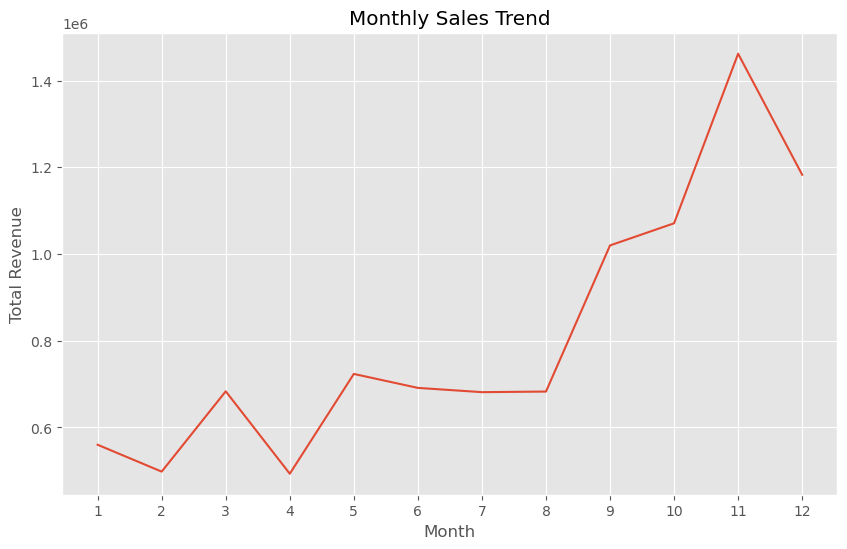

In [452]:
# Plot monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.show()

In [453]:
# Convert `InvoiceDate` to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [454]:
# Find the top 5 months
peak_months = sales_by_month.nlargest(5)

In [455]:
# Filter the DataFrame to include only rows from peak months
peak_df = df[df['InvoiceDate'].dt.to_period('M').isin(peak_months.index.to_period('M'))]

In [513]:
# Choose the top 10 items for the plot
top_10_items = top_selling_items.head(10)

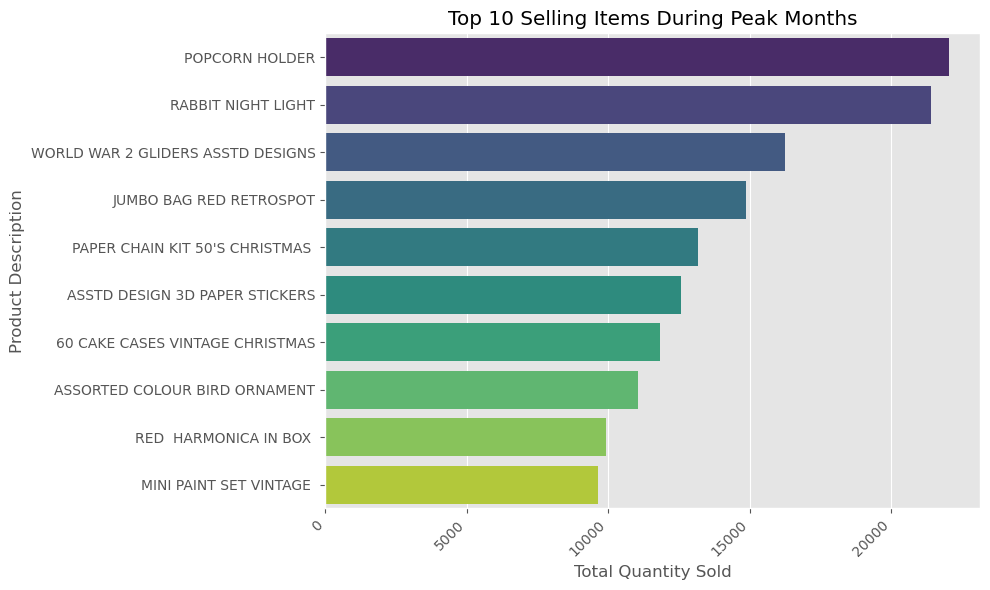

In [515]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.values, y=top_10_items.index, palette='viridis',)
plt.title('Top 10 Selling Items During Peak Months')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()